# MULTIPLE LINEAR REGRESSION

## Bike Sharing Case Study

## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Steps Involved:

- Importing necessary Libraries
- Data Sourcing (Reading and understanding the data)
- Data Cleaning
- Visualisation of the data
- Data Preparation
- Building the Linear Model
- Residual Analysis and Proof for Linear Regression Assumptions
- Model Evaluation
- Conclusion

## 1. Importing the Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(15, 10)})

### 1.1 Importing Warning Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 1.2 Importing StatsModel Library

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 1.3 Importing Scikit Library

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

### 1.4 Other Miscellaneous Libraries

In [5]:
import datetime
from scipy.stats import pearsonr

## 2. Data Sourcing (Reading and Understanding the data)

### 2.1 Loading the Data

In [6]:
# Read the data and print the first 5 rows of the dataset

bike_data=pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Independent/Predictor variables:
    
Following are the independent variables based on which the dependent variable will be predicted.

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed   

#### Dependent/Target Variable:    
    
- registered: number of registered user
- casual:     number of non-registered user
- cnt:        number of total rentals (including both registered and casual)


### 2.2 To find number of rows and columns


In [7]:
bike_data.shape

(730, 16)

### 2.3 Checking the information about the dataset

In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### 2.3 Summary statistics of the numerical values present in the dataset

In [9]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 2.4 To check the columns

In [10]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### 2.5 To check the size of the data

In [11]:
bike_data.size

11680

### 2.6 To check the dimension of the data

In [12]:
bike_data.ndim

2

### 2.7 To check the data type

In [13]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Inference: 

- There are 730 rows and 16 columns.
- Except one column all the other columns are float/integer.
- Only one column is datetype.

## 3. Data Cleaning

### 3.1 Check for NULL/Missing values

In [14]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values present in the dataset.

### 3.2 Renaming few columns for better readibility

In [15]:
bike_data.rename(columns={"yr": "year", "mnth":"month", "hum":"humidity"}, inplace=True)
bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 3.3 Checking for duplicates

In [16]:
bike_copy = bike_data.copy()

In [17]:
bike_copy.drop_duplicates(subset=None, inplace=True)

In [19]:
bike_copy.shape

(730, 16)

In [20]:
bike_data.shape

(730, 16)

After running drop duplicates the shape of the original dataframe remains the same. Hence there are no duplicate values present in the dataset.

### 3.4 Check for Junk/Unknown values

In [21]:
bike_junk=bike_data.iloc[:, 1:16]
for col in bike_junk:
    print(bike_junk[col].value_counts(ascending=False), "\n\n")

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 


3    188
2    184
1    180
4    178
Name: season, dtype: int64 


0    365
1    365
Name: year, dtype: int64 


1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64 


0    709
1     21
Name: holiday, dtype: int64 


1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64 


1    504
0    226
Name: workingday, dtype: int64 


1    463
2    246
3     21
Name: weathersit, dtype: int64 


26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 


32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2


There are no junk or unknown values in the dataset.

### 3.5 Dropping the unwanted and redundant columns

If we check the dataset there are few columns which does not add any value. Hence we can drop the following columns

- instant: It is just an identifier.
- dteday: As we have already the year and month columns we can drop the dteday column.
- casual and registered: Since casual and registered columns are break up of the cnt column we can drop these columns.
    

In [22]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [23]:
bike_new = bike_data[['season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'cnt']]

In [24]:
bike_new.shape

(730, 12)

In [25]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 3.6 Encoding/Mapping few columns

In [26]:
bike_new.season = bike_new.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [27]:
bike_new.month = bike_new.month.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [28]:
bike_new.weekday = bike_new.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

In [29]:
bike_new.weathersit = bike_new.weathersit.map({1:'clear',2:'misty',3:'light_rain', 4:'heavy_rain'})

In [30]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB



### 3.7 Handling the outliers

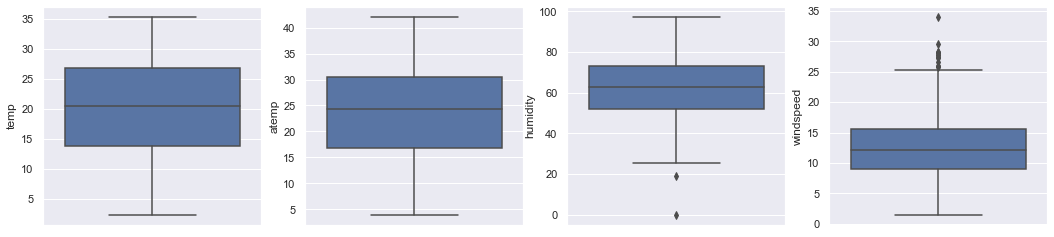

In [32]:
# Draw box plots for the independent continous variables

cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_new)
    i+=1

From the above plots we came to know that there are no outliers in the data.

## 4. Visualization of the Data

In [33]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Let us plot the independent/predictor variable against the dependent variable "cnt" i.e the total number of rentals.

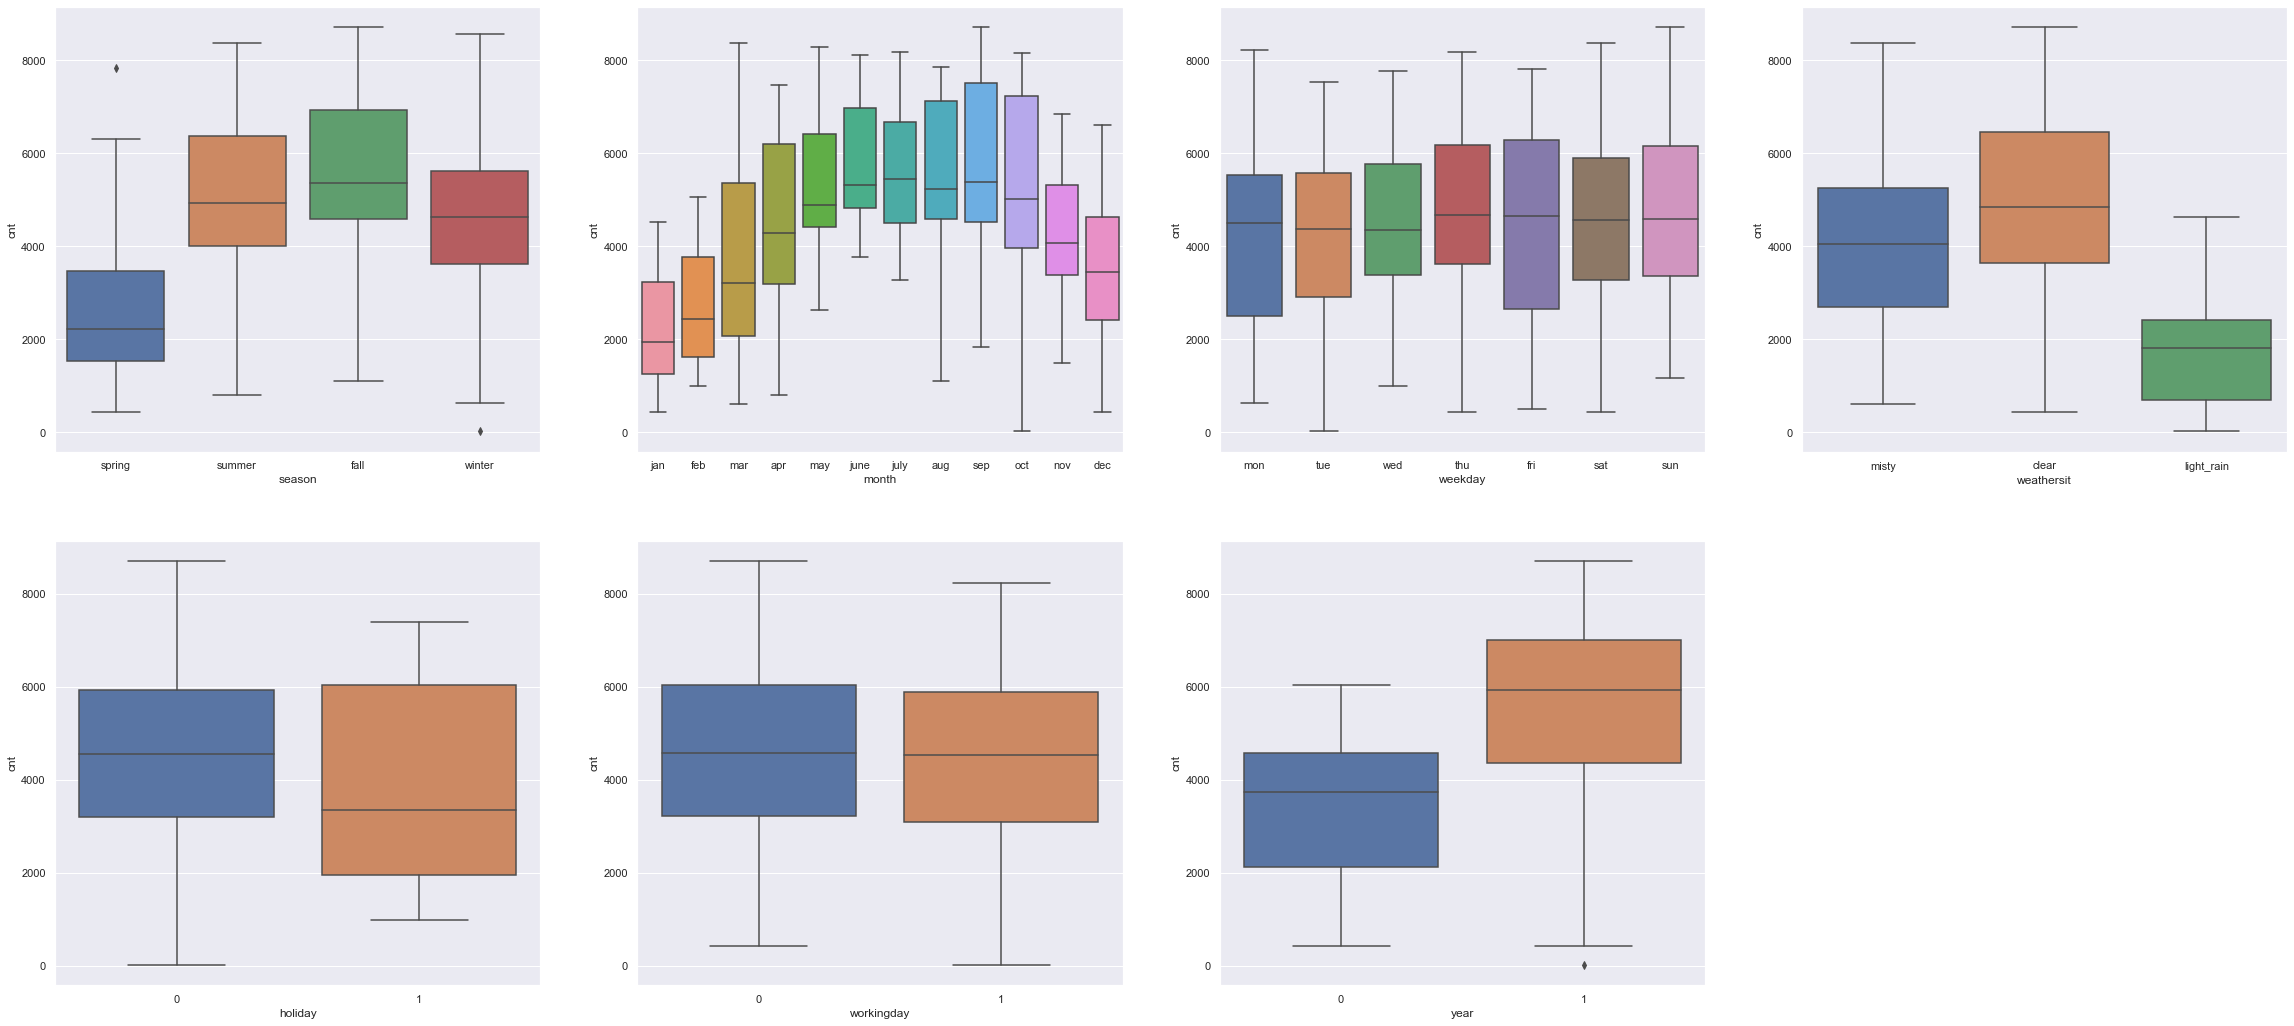

In [34]:
plt.figure(figsize=(40,18))
plt.subplot(2,4,1)
sns.boxplot(x="season", y="cnt", data=bike_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_new)
plt.show()

Let us plot a bar plot for predictor variable against the dependent variable for the years 2018 and 2019. 

In [35]:
import matplotlib.patches as mpatches

def cat(col):
    plt.figure(figsize=(14, 10))
    plt.subplot(1,2,1)
    sns.barplot(col, "cnt", data=bike_new)
    plt.suptitle(f'{col} vs. count')
    plt.subplot(1,2,2)
    ax=sns.barplot(col, "cnt", data= bike_new, hue="year", palette="Set1")
    labels=["2018","2019"]
    h, l = ax.get_legend_handles_labels()
    ax.legend(h, labels, title="Years")
    plt.show()
    

#### 1. Visualization for Season Column

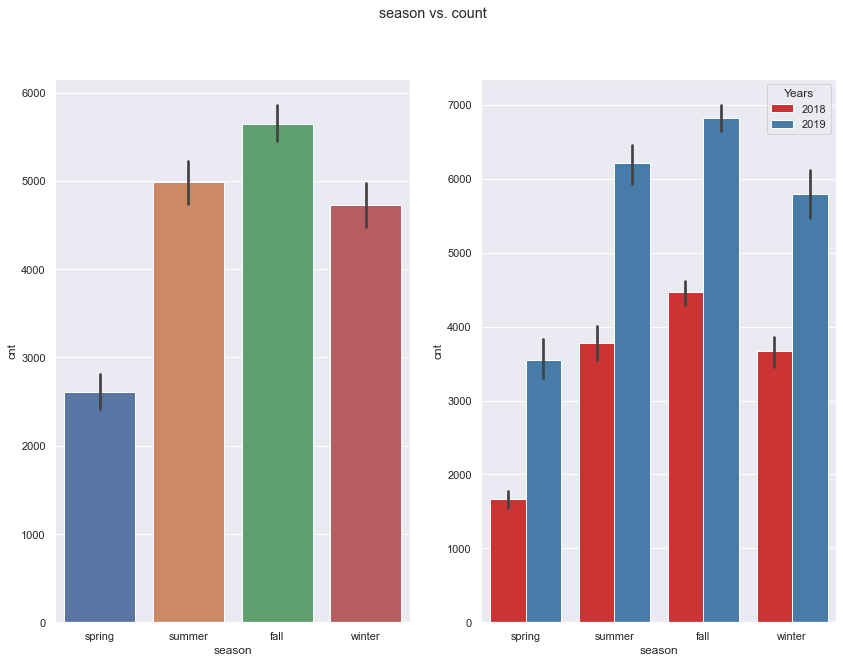

In [36]:
cat("season")

Insights:
    
- The highest bookings were done during fall season and the booking in each season has increased drastically from 2018 to 2019.    

#### 2. Visualization for Month Column

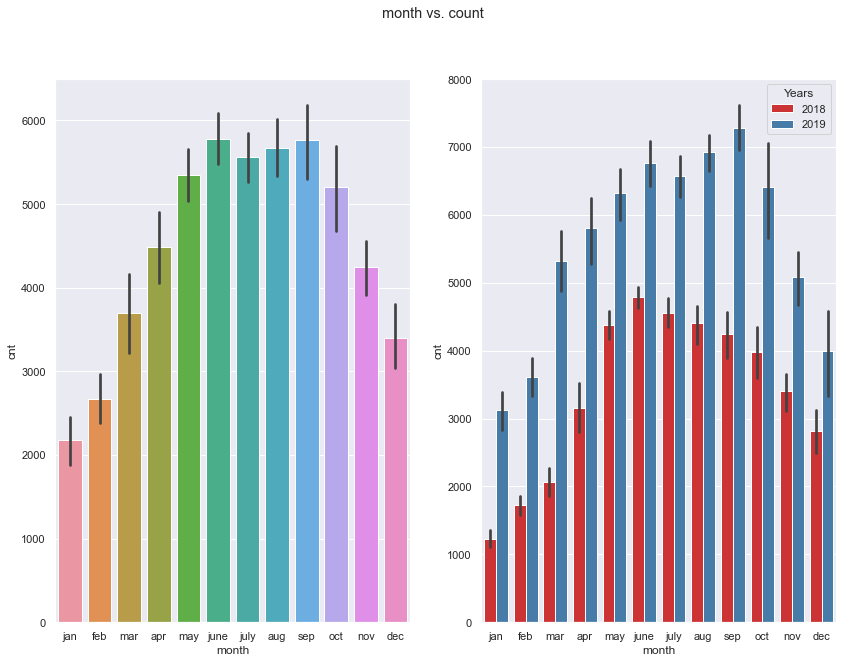

In [37]:
cat("month")

Insight:
    
-  Most of the bookings has been done during the month of may, june, july, aug, sep and oct. Bookings started slightly increasing from the start of the year till mid of the year and then it started decreasing at the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

#### 3. Visualization for weekday Column

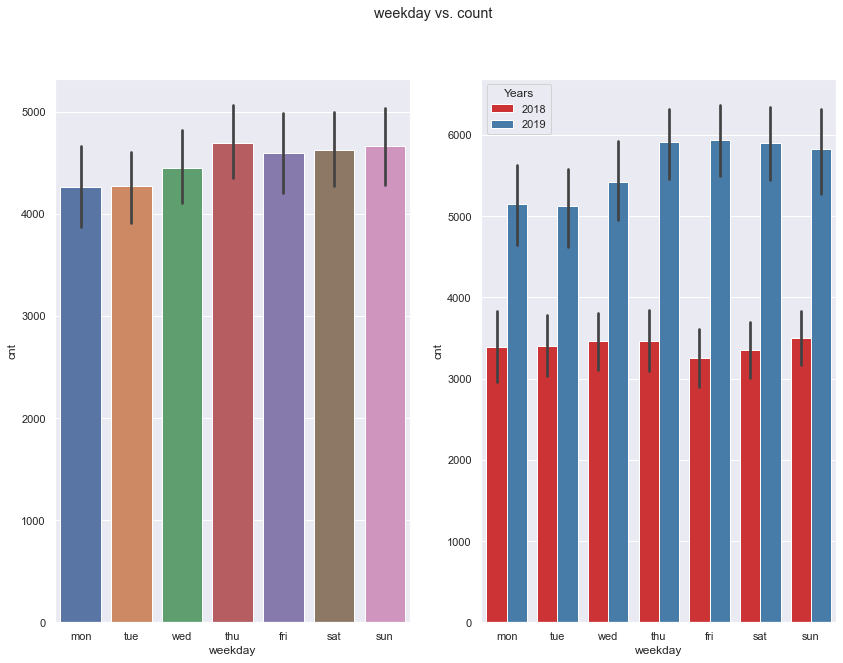

In [38]:
cat("weekday")

#### Insight:

- Thu, Fri, Sat and Sun have more number of bookings as compared to the start of the week. There is drastic increase in booking in 2019 for each day when compared to 2018.

#### 4. Visualization for weathersit Column

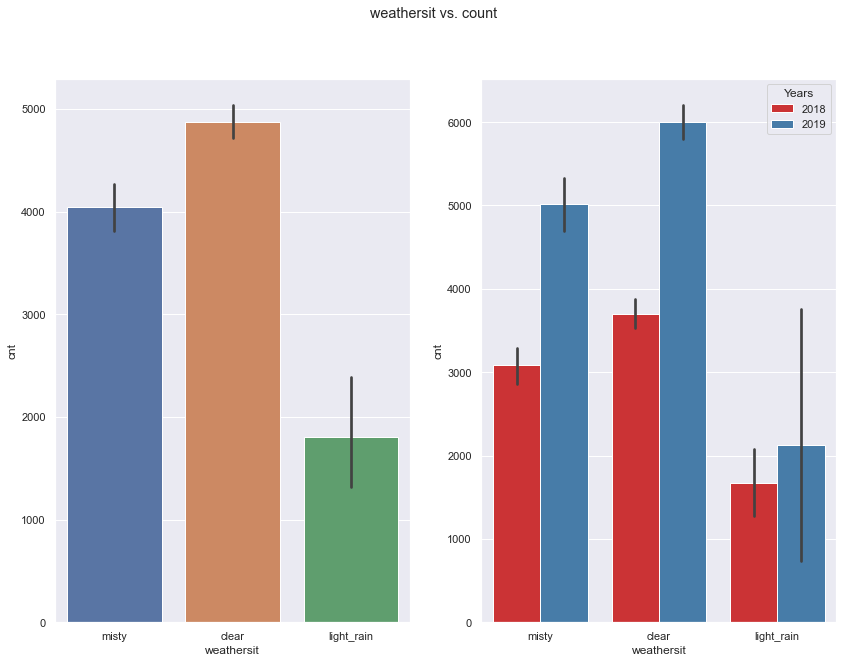

In [39]:
cat("weathersit")

#### Insight:

- Clear weather increased more booking. In comparison to previous year(2018), booking increased for each weather situation in 2019.

#### 5. Visualization for holiday Column

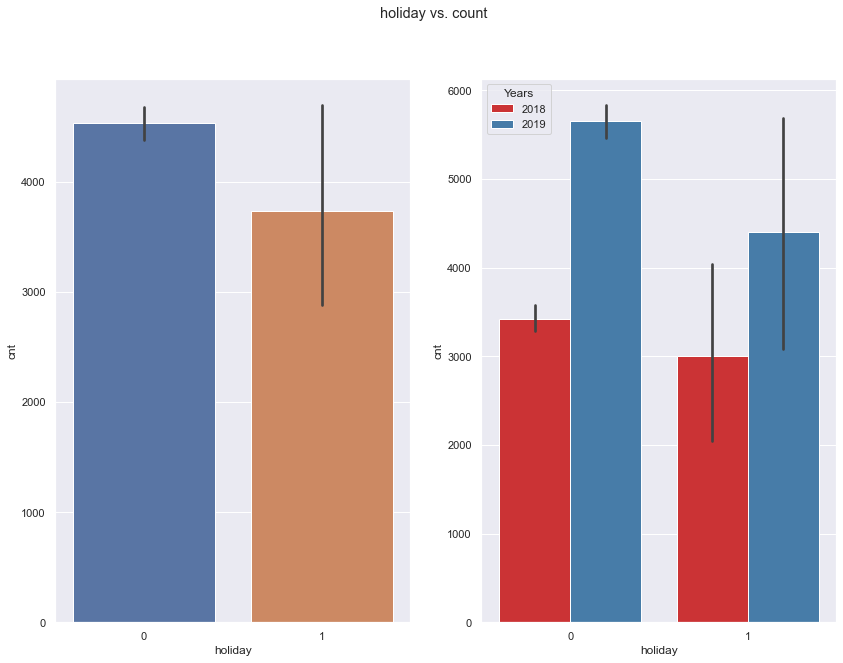

In [40]:
cat("holiday")

Insight:
    
- The bookings are less when it is not an holiday as compared to holiday. Also the bookings are more in 2019.     


#### 6. Visualization for workingday Column

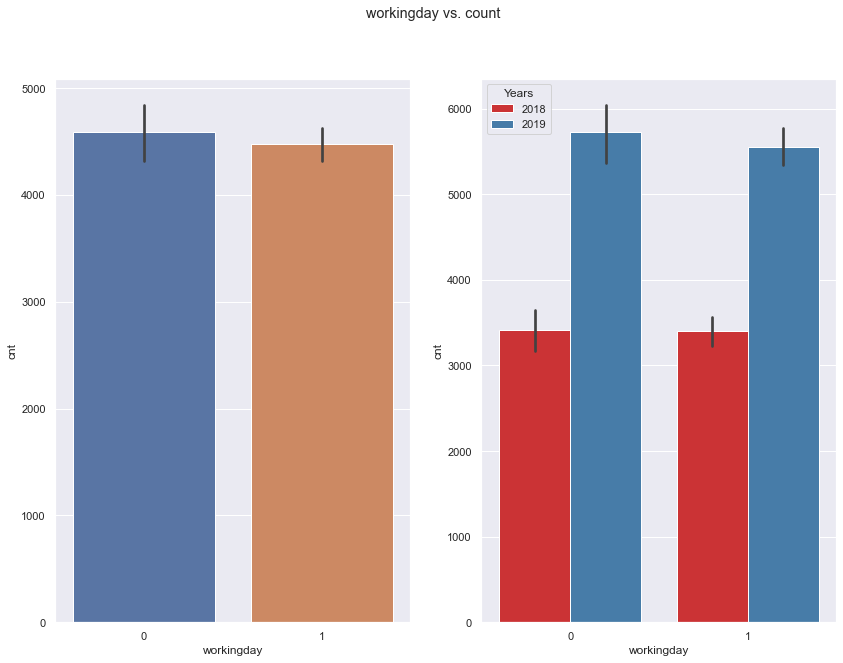

In [41]:
cat("workingday")

Insight:
    
- The number of bookings are almost same for both working or non working days but there is increase in booking in 2019 when compared to 2018.

#### 7. Visualization for year Column

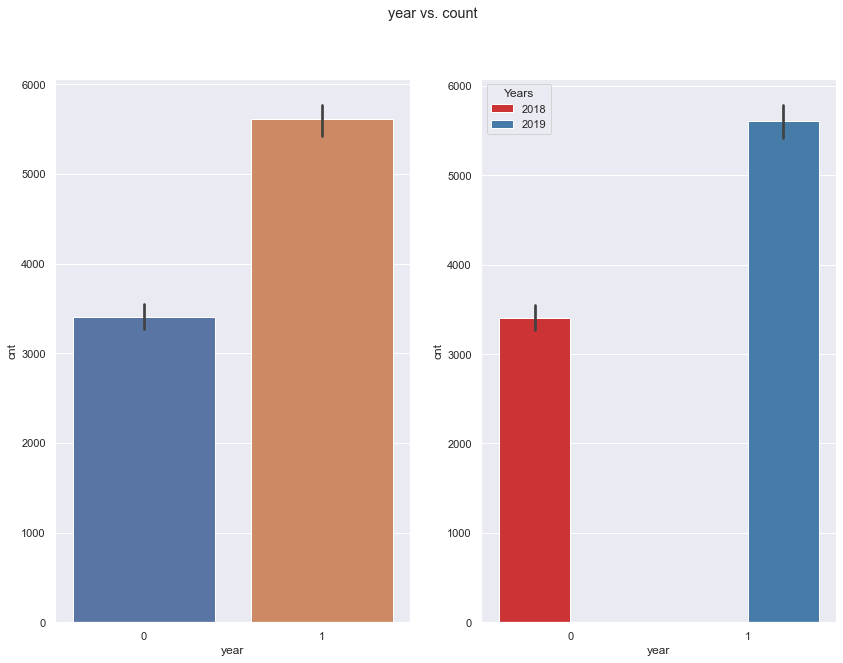

In [42]:
cat("year")

Insights:
    
- The bookings has increased in the year 2019 when compared to 2018.    

#### Visualizing the Numerical values using Pairplot

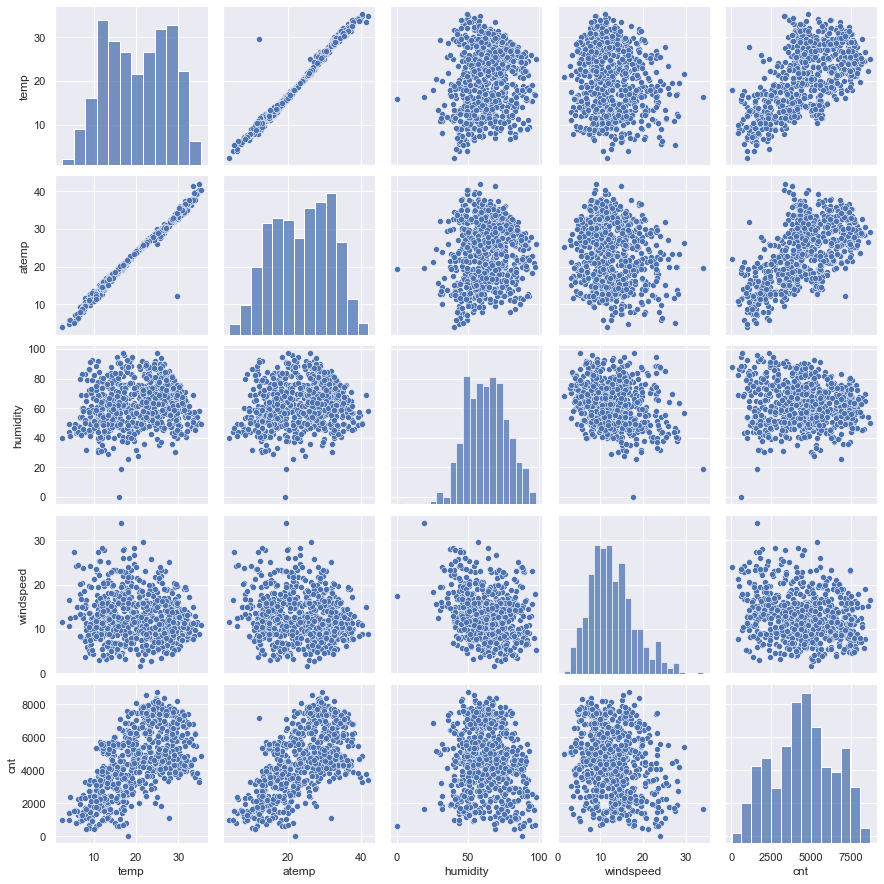

In [43]:
sns.pairplot(data=bike_new, vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

#### Insights:

- The temp and atemp has linear relationship between them.
- The temp and atemp has a linear relationship between cnt too.

#### Correlation between the numerical variables


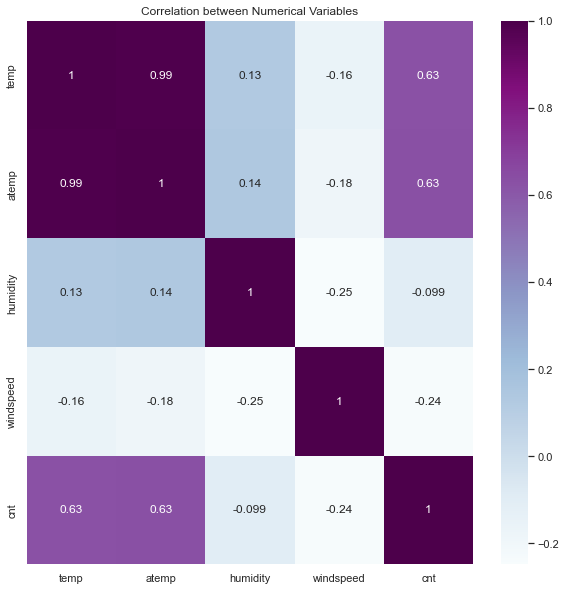

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(bike_new[["temp", "atemp", "humidity", "windspeed", "cnt"]].corr(), annot=True, cmap="BuPu")
plt.title("Correlation between Numerical Variables")
plt.show()

#### Insights:

- Temp and atemp are highly correlated with each other but due to the multicollinearity fact both the parameters cannot be used in the model. Hence one of the parameter has to be dropped and which will be done at the later stage of this case study.
- Temp and atemp also have high correlation with cnt variable.

#### Correlation between variables

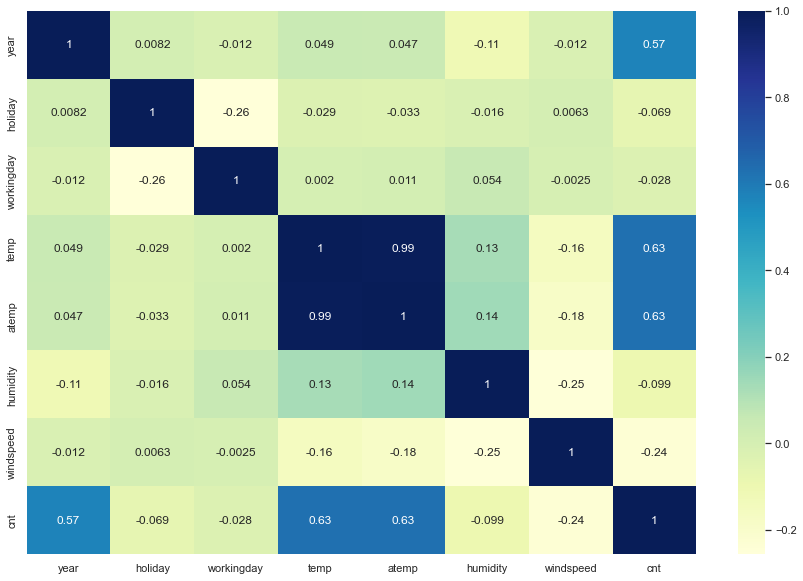

In [45]:
# Draw Heatmap of correlation

sns.heatmap(bike_new.corr(),annot=True, cmap='YlGnBu')
plt.show()

#### Insight:
    
- The target variable/dependent variable has a good linear relationship with some of the independent variables which shows a good sign in building a model.     

#### Let us check the linear relation between the numerical variables using regression plots.

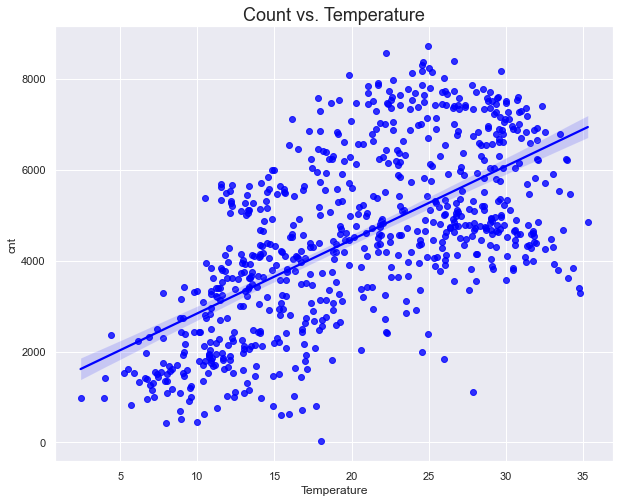

In [46]:
# regression plot

plt.figure(figsize=(10,8))
plt.title("Count vs. Temperature", fontsize=18)
sns.regplot(data=bike_new, x="temp", y="cnt", color="blue")
plt.xlabel("Temperature")
plt.show()

#### Insights:
    
- There is a positive correlation between the demand for bikes and the temperature. 
- The demand for bikes increases linearly and there is a linear relationship between them.

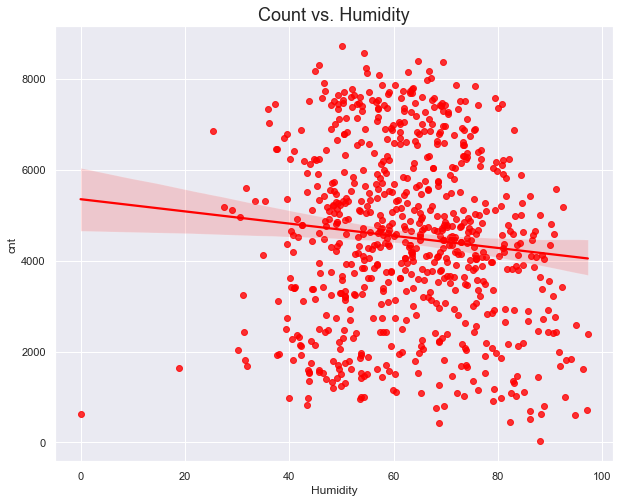

In [47]:
plt.figure(figsize=(10,8))
plt.title("Count vs. Humidity", fontsize=18)
sns.regplot(data=bike_new, x="humidity", y="cnt", color="red")
plt.xlabel("Humidity")
plt.show()

#### Insights:
    
- There is decrease in count as the humidity increases and this shows a negative correlation between them.
- The values are more scattered around.


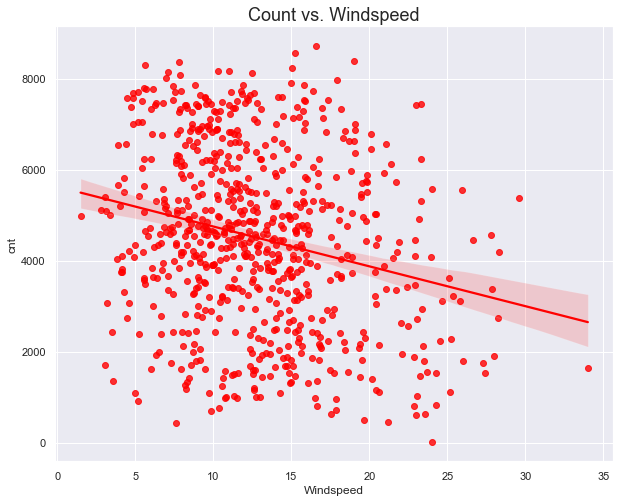

In [48]:
plt.figure(figsize=(10,8))
plt.title("Count vs. Windspeed", fontsize=18)
sns.regplot(data=bike_new, x="windspeed", y="cnt", color="red")
plt.xlabel("Windspeed")
plt.show()

#### Insights:
    
- There is decrease in count as the Windspeed increases and this shows a negative correlation between them.
- The values are more scattered around.

## 5. Data Preparation

- Creating Dummy variables for Categorical Data
- Splitting the data
- Scaling the features

### 5.1 Creating Dummy variables for Categorical Data

In [49]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


The columns "season", "month", "weekday", "weathersit" are having more than 2 categorical values. In order to perform linear regression dummy variables has to be created for these categorical columns.

- Create Dummy variable
- Drop original variable for which the dummy was created
- Drop first dummy variable for each set of dummies created.

In [50]:
month_dvar = pd.get_dummies(bike_new.month, drop_first=True)
season_dvar = pd.get_dummies(bike_new.season, drop_first=True)
weekday_dvar = pd.get_dummies(bike_new.weekday, drop_first=True)
weathersit_dvar = pd.get_dummies(bike_new.weathersit, drop_first=True)

In [51]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Merge the dataframe, with the dummy variable dataset. 



In [52]:
bike_sharing = pd.concat([bike_new, month_dvar, season_dvar, weathersit_dvar, weekday_dvar], axis=1)
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,summer,winter,light_rain,misty,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [53]:
bike_sharing.shape

(730, 34)

Dropping unnecessary columns as we have already created dummy variable.




In [54]:
bike_sharing.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [55]:
bike_sharing.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,summer,winter,light_rain,misty,mon,sat,sun,thu,tue,wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
bike_sharing.shape

(730, 30)

In [77]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    uint8  
 9   dec         730 non-null    uint8  
 10  feb         730 non-null    uint8  
 11  jan         730 non-null    uint8  
 12  july        730 non-null    uint8  
 13  june        730 non-null    uint8  
 14  mar         730 non-null    uint8  
 15  may         730 non-null    uint8  
 16  nov         730 non-null    uint8  
 17  oct         730 non-null    uint8  
 18  sep         730 non-null    uint8  
 19  spring      730 non-null    u

### 5.2 Splitting the Data

The dataset is splitted into 

- Train data
- Test data

In [78]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_sharing, train_size = 0.7, random_state = 100)

In [79]:
bike_train.shape

(510, 30)

In [80]:
bike_test.shape

(220, 30)

### 5.3 Scaling the Features

#### Rescaling the features using the MinMaxscaler

In [81]:
scaler = MinMaxScaler()

In [82]:
vars = ['temp','atemp','humidity','windspeed','cnt']
bike_train[vars] = scaler.fit_transform(bike_train[vars])

In [83]:
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,summer,winter,light_rain,misty,mon,sat,sun,thu,tue,wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,1,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,1,0,0,1,0,0,0


In [84]:
bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,summer,winter,light_rain,misty,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.247059,0.247059,0.029412,0.345098,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.431725,0.431725,0.169124,0.475867,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Check the correlation coefficient of all the variables to know if they are highly correlated

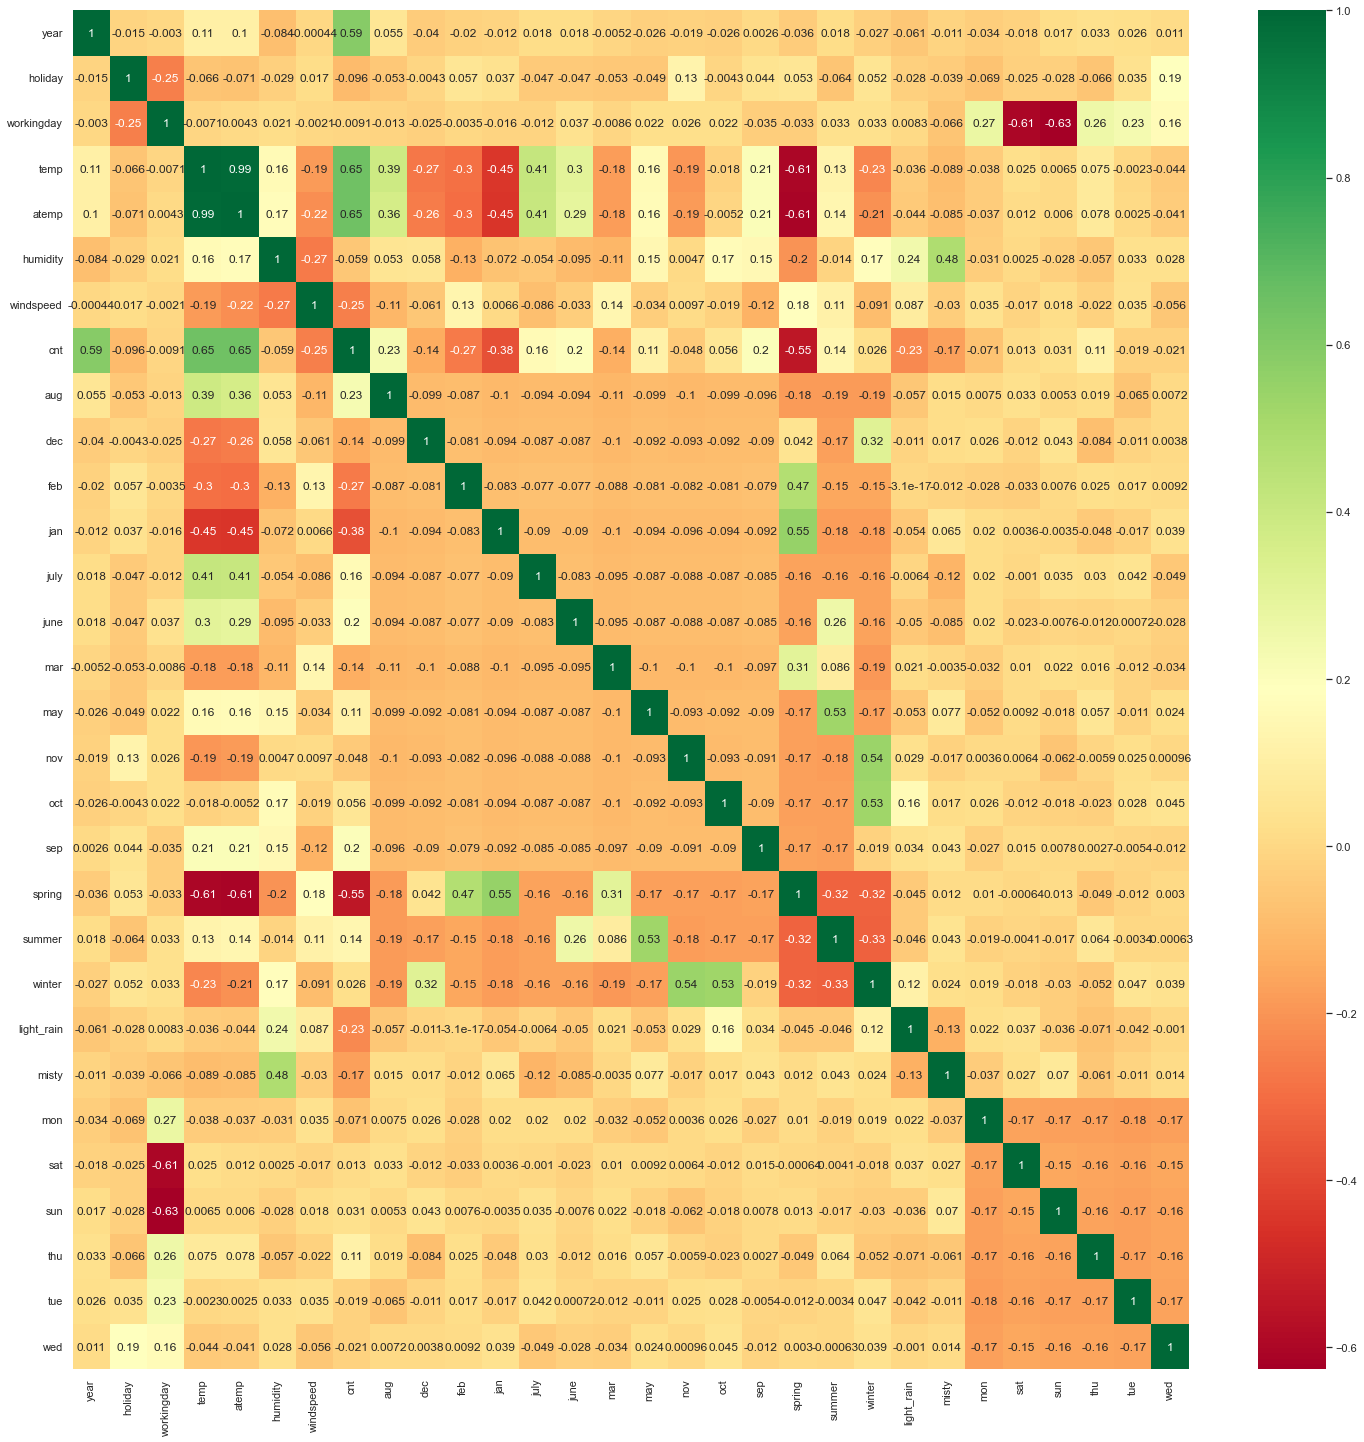

In [85]:
plt.figure(figsize = (25,25))
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Insights:
    
- cnt seems to have correlation with year variable and temp. 
- Misty and humidity show correlation. 
- Spring season with Jan and Feb month, 
- Summer season with may month and 
- Winter season with oct and nov month show good correlation.    

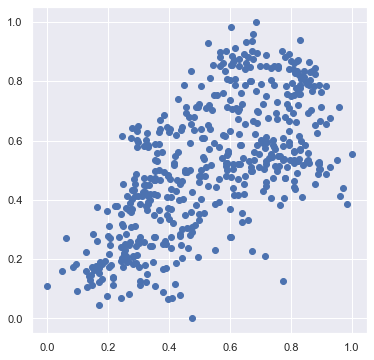

In [86]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

There is positive correlation between temp and cnt.

## 6. Building the Linear Model

### 6.1 Dividing the train set 

In [87]:
y_train = bike_train.pop('cnt')
x_train = bike_train

### 6.2 RFE (Recursive Feature Elimination)

Currently, we have almost 30 Predictors to Predict our outcome. Analysing these many predictors can be very hectic.
In order to simplify the process, we will use RFE (Recursive Feature Elimination) method which will provide us with set of variables ranked in an order of importance.


In [88]:
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [91]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light_rain', True, 1),
 ('misty', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11)]

In [92]:
# Variables selected using RFE

col = x_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'spring', 'summer', 'winter', 'light_rain',
       'misty'],
      dtype='object')


In [93]:
# checking for columns which has been rejected

x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [94]:
# dataframe with RFE selected variables

x_train_rfe = x_train[col]

### 6.3 VIF (Variance Inflation Factor)

In [95]:
# Defining a function for VIF

def vif_bike(df):
    vif_bike = pd.DataFrame()
    vif_bike['Features'] = df.columns
    vif_bike['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_bike['VIF'] = round(vif_bike['VIF'], 2)
    vif_bike = vif_bike.sort_values(by='VIF', ascending=False)
    vif_bike = vif_bike.reset_index(drop=True)
    return vif_bike

### 6.4 Linear Regression Model 1

Using RFE method we have got the top 15 predictors which will impact our outcome. We will continue validating this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements. First we shall build a model with all the 15 features.

In [96]:
import statsmodels.api as sm

# Add a constant
x_train_lm1 = sm.add_constant(x_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, x_train_lm1).fit()

In [97]:
lr1.params

const         0.319667
year          0.230404
holiday      -0.091089
temp          0.481503
humidity     -0.162213
windspeed    -0.188726
dec          -0.035461
jan          -0.043411
july         -0.055250
nov          -0.038701
sep           0.075467
spring       -0.061255
summer        0.042337
winter        0.101921
light_rain   -0.246481
misty        -0.054300
dtype: float64

In [98]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          8.15e-189
Time:                        07:03:45   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

In [99]:
vif_bike(x_train_rfe)

,Features,VIF
0,humidity,30.89
1,temp,17.79
2,windspeed,4.72
3,spring,4.37
4,winter,4.06
5,summer,2.82
6,misty,2.32
7,year,2.09
8,nov,1.85
9,jan,1.75


#### Inference: 
    
- As humidity shows high VIF value we can drop this feature.

### 6.5 Linear Regression Model 2

#### As the VIF is higher for humidity we shall drop this feature and proceed with building model 2.

In [100]:
x_train_new = x_train_rfe.drop(['humidity'], axis = 1)
x_train_lm_2 = sm.add_constant(x_train_new)
lr_2 = sm.OLS(y_train,x_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          4.75e-186
Time:                        07:03:49   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

In [101]:
vif_bike(x_train_new)

,Features,VIF
0,temp,5.17
1,windspeed,4.67
2,winter,2.95
3,spring,2.89
4,summer,2.24
5,year,2.07
6,nov,1.81
7,jan,1.66
8,july,1.59
9,misty,1.57


VIF values seems to be good now. The p-value for the feature nov is high.

### 6.6 Linear Regression Model 3 

In [102]:
# We can drop nov variable as it has high p-value and proceed with building model 3.

x_train_new = x_train_new.drop(["nov"], axis = 1)
x_train_lm_3 = sm.add_constant(x_train_new)
lr_3 = sm.OLS(y_train,x_train_lm_3).fit()
print(lr_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          2.74e-186
Time:                        07:03:52   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.0

In [103]:
vif_bike(x_train_new)

,Features,VIF
0,temp,5.14
1,windspeed,4.62
2,spring,2.89
3,summer,2.24
4,year,2.07
5,winter,2.05
6,jan,1.65
7,july,1.59
8,misty,1.57
9,sep,1.34


The VIF is still good even after dropping few features. Let us observe more to get a better model. The p value for dec is high.

### 6.7 Linear Regression Model 4

In [104]:
# We can drop dec variable as it has high p-value and proceed with building model 4.

x_train_new = x_train_new.drop(["dec"], axis = 1)
x_train_lm_4 = sm.add_constant(x_train_new)
lr_4 = sm.OLS(y_train,x_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          8.14e-187
Time:                        07:03:56   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [105]:
vif_bike(x_train_new)

,Features,VIF
0,temp,5.13
1,windspeed,4.62
2,spring,2.75
3,summer,2.24
4,year,2.07
5,winter,1.78
6,jan,1.61
7,july,1.59
8,misty,1.56
9,sep,1.34


### 6.8 Linear Regression Model 5

In [106]:
# We can drop jan variable as it has high p-value
x_train_new = x_train_new.drop(['jan'], axis = 1)
x_train_lm_5 = sm.add_constant(x_train_new)
lr_5 = sm.OLS(y_train,x_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          5.06e-187
Time:                        07:03:59   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [107]:
vif_bike(x_train_new)

,Features,VIF
0,temp,5.09
1,windspeed,4.60
2,summer,2.23
3,spring,2.08
4,year,2.07
5,winter,1.78
6,july,1.58
7,misty,1.55
8,sep,1.34
9,light_rain,1.08


### 6.9 Linear Regression Model 6

In [108]:
# We can drop july variable as it has high p-value

x_train_new = x_train_new.drop(['july'], axis = 1)
x_train_lm_6 = sm.add_constant(x_train_new)
lr_6 = sm.OLS(y_train, x_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sat, 27 Aug 2022   Prob (F-statistic):          1.47e-186
Time:                        07:04:01   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.0

In [109]:
vif_bike(x_train_new)

,Features,VIF
0,windspeed,4.60
1,temp,3.84
2,year,2.07
3,spring,1.99
4,summer,1.90
5,winter,1.63
6,misty,1.55
7,sep,1.23
8,light_rain,1.08
9,holiday,1.04


#### Inference:

All the p values and the VIF are under control and hence we can consider the model 6 as the final linear regression model.

### Final Model Interpretation


#### Hypothesis Testing:

H0: B1 = B2 = ... = Bn = 0

H1: atleast one Bi != 0

#### Coefficient values:

In [110]:
lr_6.params

const         0.190855
year          0.234132
holiday      -0.096316
temp          0.477737
windspeed    -0.148098
sep           0.090998
spring       -0.055406
summer        0.062076
winter        0.094476
light_rain   -0.285031
misty        -0.078741
dtype: float64

Since all the cooefficient values are not equal to zero we reject the null hypothesis.

#### F Statistics:

The more the F statistic value is the more significant the model is.

From the model 6 the F statistics is 248.4

Prob (F-statistic): 1.47e-186

The F-Statistics value of 248.4 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant    


#### Equation of Best fitted line based on Model 6 (lr_6):

cnt = 0.190855 + (year × 0.234132) - (holiday × 0.096316) + (temp × 0.477737) − (windspeed × 0.148098) + (sep × 0.090998) - (spring × 0.055406) + (summer × 0.062076) + (winter × 0.094476) - (light_rain × 0.285031) − (misty × 0.078741)

#### Interpretation of Coefficients:

- year: A coefficient value of 0.234132 indicates that a unit increase in year variable, increases the bike hire numbers by 0.234132 units.

- holiday: A coefficient value of -0.096316 indicates that a unit increase in holiday variable decreases the bike hire numbers by 0.096316 units.

- temp: A coefficient value of 0.477737 indicates that a unit increase in temp variable, increases the bike hire numbers by 0.477737 units.    
    
- windspeed: A coefficient value of -0.148098 indicates that, a unit increase in windspeed variable decreases the bike hire numbers by 0.148098 units.

- sep: A coefficient value of 0.090998 indicates that, a unit increase in sep variable increases the bike hire numbers by 0.090998 units.

- spring: A coefficient value of -0.055406 indicates that a unit increase in spring variable decreases the bike hire numbers by 0.055406 units.

- summer: A coefficient value of 0.062076 indicates that a unit increase in summer variable increases the bike hire numbers by 0.062076 units.

- winter: A coefficient value of 0.094476 indicates that a unit increase in winter variable increases the bike hire numbers by 0.094476 units.

- light_rain: A coefficient value of -0.285031 indicates that a unit increase in light_rain variable decreases the bike hire numbers by 0.285031 units.
    
- misty: A coefficient value of -0.078741 indicates that a unit increase in misty variable decreases the bike hire numbers by 0.078741 units.    

- const: The Constant value of 0.190855 indicates that in the absence of all other predictor variables (i.e. when x1,x2...xn =0), the bike rental can still increase by 0.190855 units.

## 7. Residual Analysis and Proof for Linear Regression Assumptions

Once we are done with our Model we have to check whether the data in our model is violating any of our linear regression assumption. Below are the assumptions:
    
- Normally Distributed Error Terms
- Error Terms Being Independent
- Homoscedasticity
- Multicollinearity
- Linear Relationship validation

### 7.1 Normally Distributed Error Terms

In [111]:
x_train_lm_6

,const,year,holiday,temp,windspeed,sep,spring,summer,winter,light_rain,misty
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,0,1
111,1.0,0,0,0.345824,0.380981,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,1,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,0,1


In [112]:
y_train_pred = lr_6.predict(x_train_lm_6)
residual = y_train_pred - y_train

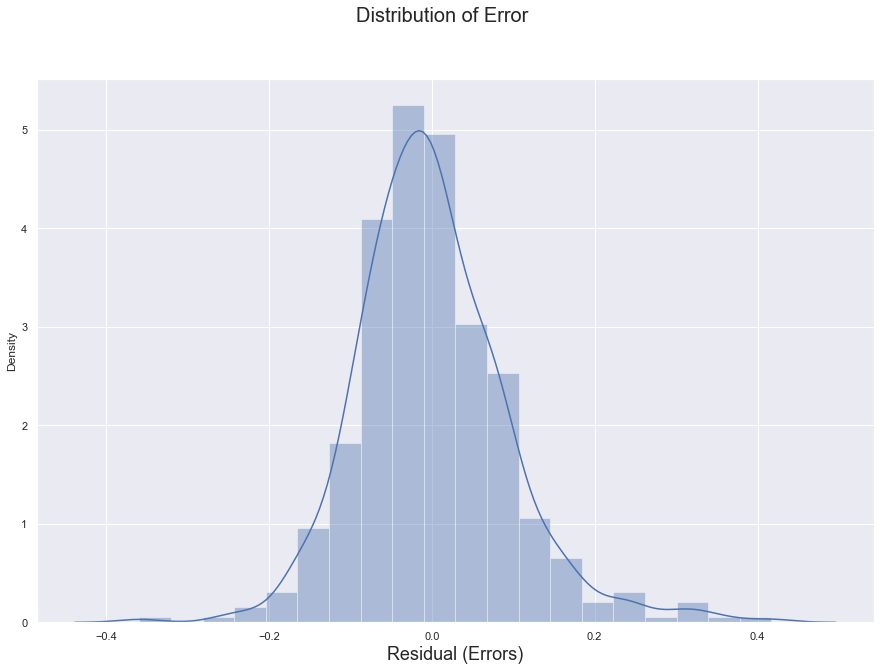

In [113]:
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Distribution of Error', fontsize = 20) 
plt.xlabel('Residual (Errors)', fontsize = 18)
plt.show()

#### Inference:

The residuals are normally ditributed i.e the errors are distributed across zero which proves that our model has properly handled the assumption of normal distribution of errors.

### 7.2 Error terms being Independent

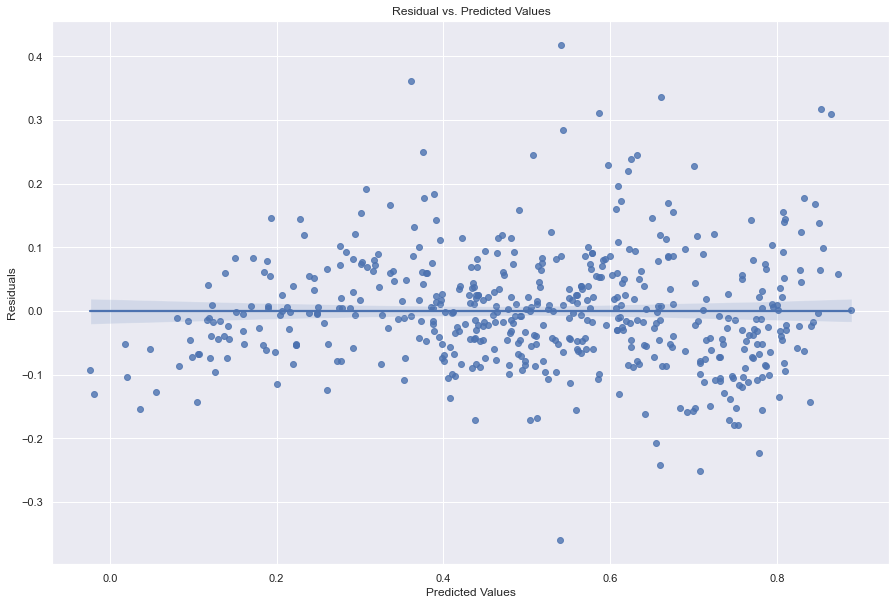

In [114]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [115]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Value Against Residual ==> 4.5176536123126e-15


#### Inference:
    
When we plotted the scatter plot there is almost no relation between residual and predicted values. This means the model does not have any specific pattern which concludes that they are not dependent on each other.

### 7.3 Homoscedasticity

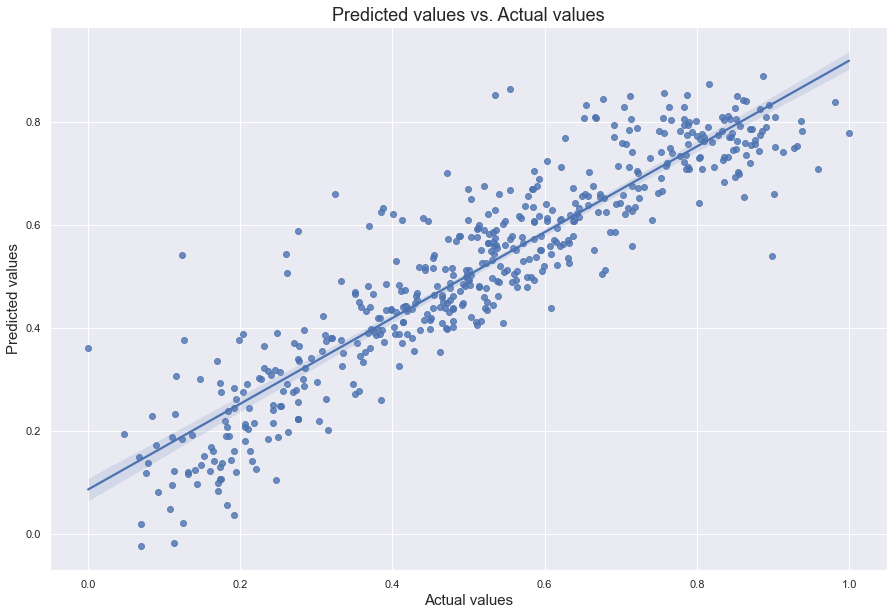

In [116]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted values vs. Actual values', fontdict={'fontsize': 18})
plt.xlabel('Actual values', fontdict={'fontsize': 15})
plt.ylabel('Predicted values', fontdict={'fontsize': 15})
plt.show()

#### Inference:

The residuals are equally distributed across predicted values and this means we see equal variance and there is neither high concentration of data points in one region nor low concentration of data points in other region. This proves the Homoscedasticity of Error Terms.

### 7.4 Multicollinearity

In [117]:
# This has been checked while model building stage.

vif_bike(x_train_new)

,Features,VIF
0,windspeed,4.60
1,temp,3.84
2,year,2.07
3,spring,1.99
4,summer,1.90
5,winter,1.63
6,misty,1.55
7,sep,1.23
8,light_rain,1.08
9,holiday,1.04


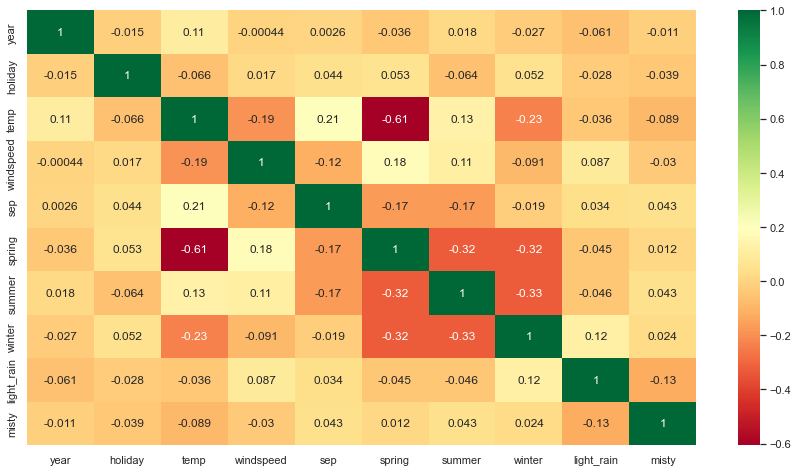

In [118]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### Inference:

There is no multicollinearity between the predicted variables as we could see that the VIF values are below 5.

### 7.5 Linear Relationship Validation

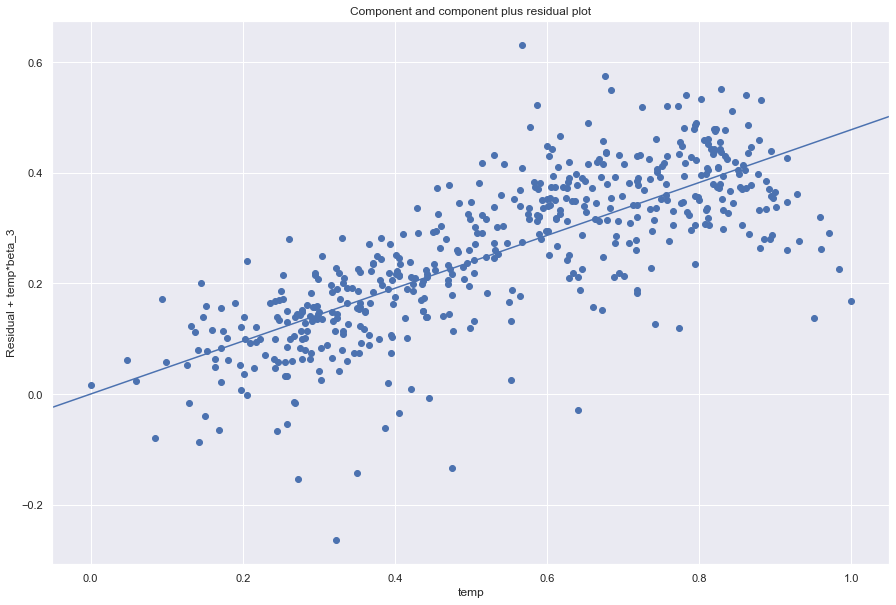

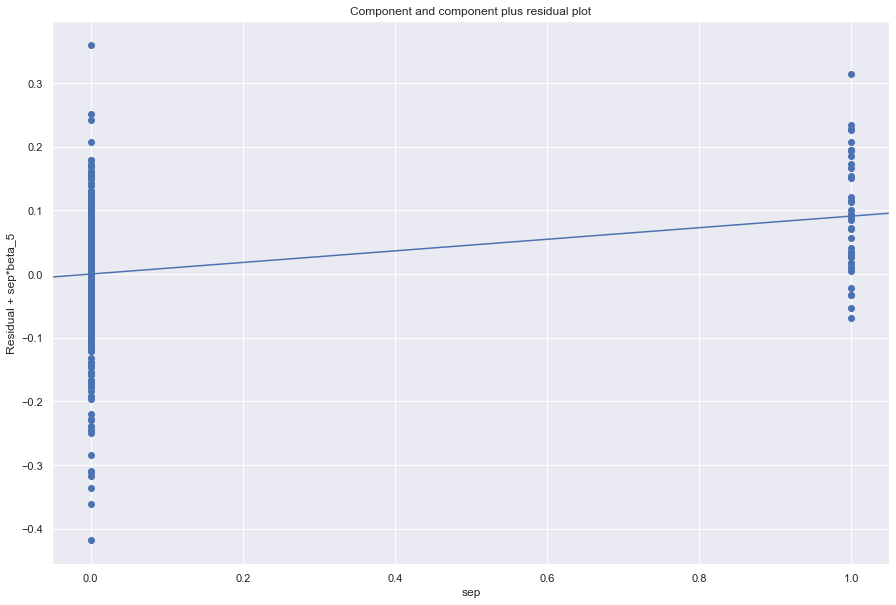

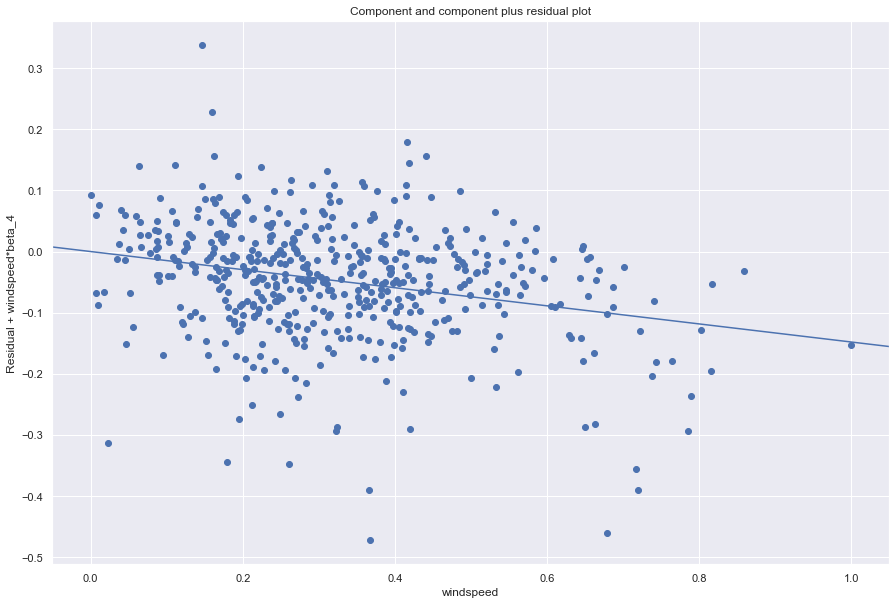

In [119]:
# Linear relationship validation using Component and component plus residual (CCPR) plot


sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

#### Insight:

Linearity can be observed from above visualizations.

## 8. Making Predictions using the Final Model

Now that we have built the model and checked the normality of error terms, we shall make predictions using the final Model 6.

In [120]:
# Scaling the features on the test data set

vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bike_test[vars] = scaler.transform(bike_test[vars])
bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,summer,winter,light_rain,misty,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,1,0,0,0,0


In [121]:
bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,summer,winter,light_rain,misty,mon,sat,sun,thu,tue,wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.263636,0.236364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.441609,0.425817,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
y_test = bike_test.pop('cnt')
x_test = bike_test


In [123]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   atemp       220 non-null    float64
 5   humidity    220 non-null    float64
 6   windspeed   220 non-null    float64
 7   aug         220 non-null    uint8  
 8   dec         220 non-null    uint8  
 9   feb         220 non-null    uint8  
 10  jan         220 non-null    uint8  
 11  july        220 non-null    uint8  
 12  june        220 non-null    uint8  
 13  mar         220 non-null    uint8  
 14  may         220 non-null    uint8  
 15  nov         220 non-null    uint8  
 16  oct         220 non-null    uint8  
 17  sep         220 non-null    uint8  
 18  spring      220 non-null    uint8  
 19  summer      220 non-null   

In [124]:
col = x_train_new.columns
x_test=x_test[col]

# Adding constant to test dataframe

x_test_lm_6 = sm.add_constant(x_test)

In [125]:
x_test_lm_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   year        220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   temp        220 non-null    float64
 4   windspeed   220 non-null    float64
 5   sep         220 non-null    uint8  
 6   spring      220 non-null    uint8  
 7   summer      220 non-null    uint8  
 8   winter      220 non-null    uint8  
 9   light_rain  220 non-null    uint8  
 10  misty       220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [126]:
y_pred = lr_6.predict(x_test_lm_6)

#### R^2 value for test data

In [127]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

## 9. Model Evaluation

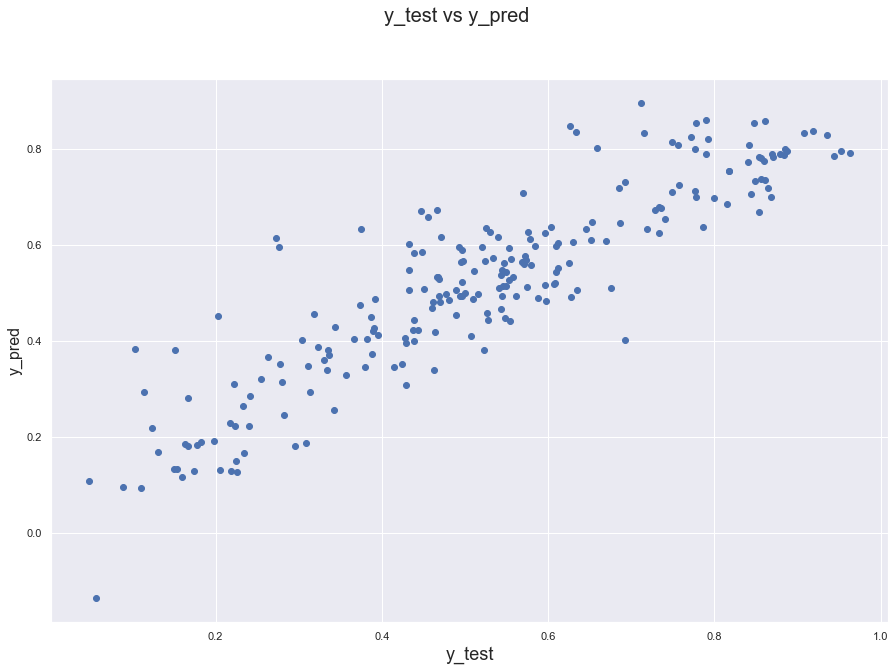

In [128]:
# Let us plot the actual and predicted values.

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [129]:
round(lr_6.params,4)

const         0.1909
year          0.2341
holiday      -0.0963
temp          0.4777
windspeed    -0.1481
sep           0.0910
spring       -0.0554
summer        0.0621
winter        0.0945
light_rain   -0.2850
misty        -0.0787
dtype: float64

#### Adjusted-R^2 value for the test dataset

In [130]:
# n is number of rows in x
n = x_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = x_test.shape[1]

# We find the Adjusted R^2 using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7944329770189553

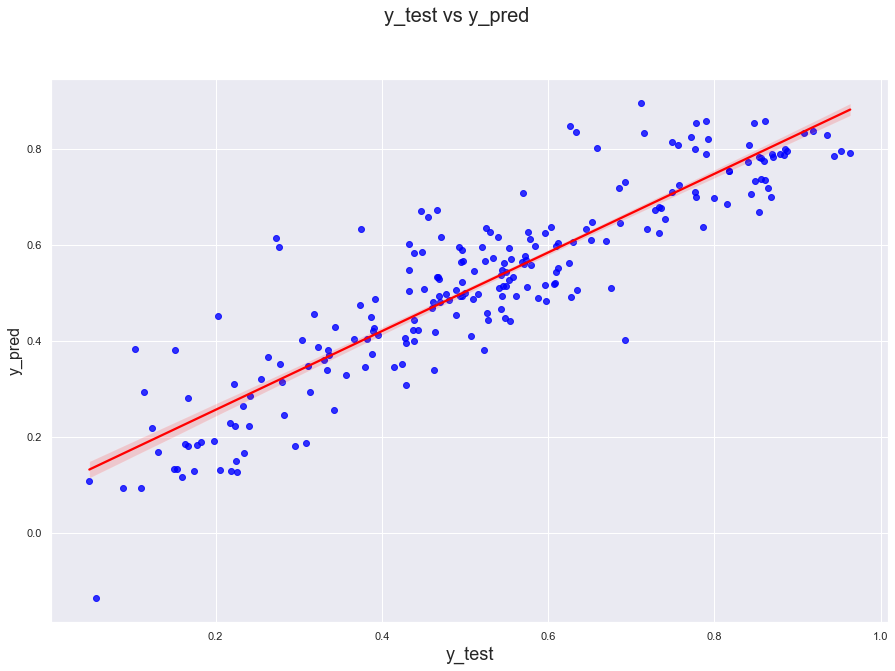

In [131]:
fig = plt.figure()
sns.regplot(x= y_test, y = y_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### Comparison of R^2 and adjusted R^2 between train and test data.

- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7944

## Conclusion

After analysing the final model the company should focus on the following features:
    
- Temperature is the most significant feature that positively affects the business.
- Whereas the other climatic conditions such as windspeed, light_rain and misty affects the business negatively.
- The demand of bikes are more in summer and winter rather than spring.
- There is demand of bikes during the month of September when compared to other months.
- Also there is significant rise in demand for bikes from 2018 to 2019.

Therefore the demand for bikes depends on year, holiday, temp, windspeed, sep, spring, summer, winter, light_rain and Misty.